In [1]:
#Name: Valerie Hernandez
#Student ID: 2956556
#Table Number: 3
#Table Members: Alexis Ng, Alice Kuang, Eva Morrison, Brooke Jackson
#Assignment Name: Worksheet 8 - Regression

In [3]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘modelenv’, ‘conflicted’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [5]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
#source('cleanup.R')


Attaching package: ‘rlang’


The following objects are masked from ‘package:testthat’:

    is_false, is_null, is_true


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




In [6]:
#Question 0.0
answer0.0 <- "B"
test_0.0()

Test passed 😀
[1] "Success!"


In [16]:
#Question 0.1
answer0.1 <- "C"
test_0.1()

Test passed 😸
[1] "Success!"


In [34]:
#Question 0.2
sum <- (1-1.3)^2 + (1-1.5)^2 + (2-1.5)^2 + (3-2)^2 + (5-6)^2 + (7-6)^2
rmse <- sqrt((1/6)*sum)
rmse
answer0.2 <- 0.77
test_0.2()

[1] 0.7735201

Test passed 😀
[1] "Success!"


In [11]:
#Question 0.3
answer0.3 <- "A"
test_0.3()

Test passed 😸
[1] "Success!"


In [35]:
#Question 1.0
marathon <- read_csv("data/marathon.csv")
marathon
test_1.0()

Rows: 929 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, bmi, female, footwear, group, injury, mf_d, mf_di, mf_ti, max...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
44,24.23762,0,2,3,1,42195,2,12289,63,1,3.433558,3.413611
34,21.24975,0,2,3,1,42195,3,12602,32,0,3.348278,3.500556
41,25.20479,0,2,1,1,42195,2,13500,20,1,3.125556,3.750000


Test passed 🥇
Test passed 🌈
Test passed 🎊
Test passed 🎊
[1] "Success!"


In [45]:
?sample_n

Test passed 🥇
Test passed 🎉
Test passed 🎉
Test passed 🥳
Test passed 😸
Test passed 😀
Test passed 😀
[1] "Success!"


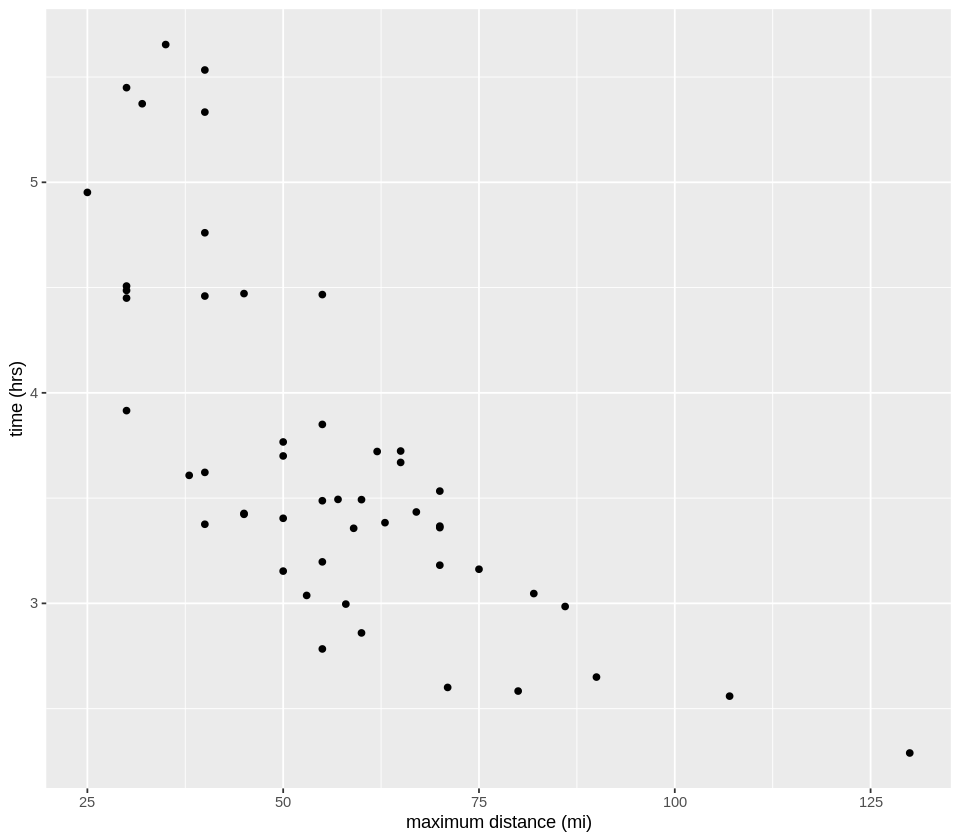

In [49]:
#Question 2.0
options(repr.plot.width = 8, repr.plot.height = 7)

set.seed(2000) ### DO NOT CHANGE

marathon_50 <- marathon %>%
    sample_n(50)

answer2 <- marathon_50 %>%
   ggplot(aes(x=max, y=time_hrs)) +
            labs(x = "maximum distance (mi)", y = "time (hrs)") +
            geom_point()
          
answer2
test_2.0()


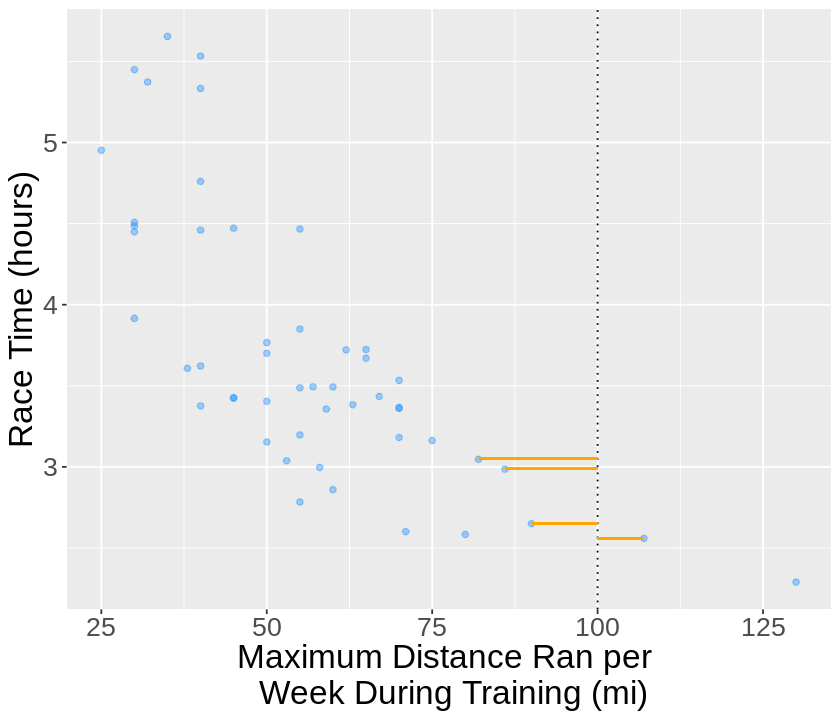

In [50]:
# run this cell to see a visualization of the 4 nearest neighbours
options(repr.plot.height = 6, repr.plot.width = 7)
marathon_50 %>%
    ggplot(aes(x = max, y = time_hrs)) + 
        geom_point(color = 'dodgerblue', alpha = 0.4) +
        geom_vline(xintercept = 100, linetype = "dotted") +
        xlab("Maximum Distance Ran per \n Week During Training (mi)") +
        ylab("Race Time (hours)") + 
        geom_segment(aes(x = 100, y = 2.56, xend = 107, yend = 2.56), col = "orange") +
        geom_segment(aes(x = 100, y = 2.65, xend = 90, yend = 2.65), col = "orange") +
        geom_segment(aes(x = 100, y = 2.99, xend = 86, yend = 2.99), col = "orange") +
        geom_segment(aes(x = 100, y = 3.05, xend = 82, yend = 3.05), col = "orange") +
        theme(text = element_text(size = 20))
     

In [53]:
#Question 3.0
answer3 <- marathon_50 %>% 
  mutate(diff = abs(100 - max)) %>% 
  arrange(diff) %>% 
  slice(1:4) %>%  
  summarise(predicted = mean(time_hrs)) %>%
  pull()

answer3
test_3.0()

[1] 2.810347

Test passed 🎉
Test passed 🥳
[1] "Success!"


In [54]:
#Question 4.0
answer4 <- marathon_50 %>% 
  mutate(diff = abs(100 - max)) %>% 
  arrange(diff) %>% 
  slice(1,2) %>%  
  summarise(predicted = mean(time_hrs)) %>%
  pull()

test_4.0()

Test passed 🥳
Test passed 🥇
[1] "Success!"


In [58]:
#Question 5.0
answer5 <- "C"
test_5.0()

Test passed 🥇
Test passed 🎉
[1] "Success!"


In [68]:
#Question 6.0
set.seed(2000) ### DO NOT CHANGE


marathon_split <- initial_split(marathon, prop = .25, strata = time_hrs)

marathon_testing <- training(marathon_split) #actually training
marathon_training <- testing(marathon_split)#actually testing

test_6.0()

Test passed 🥳
Test passed 🥇
Test passed 🥇
Test passed 🎊
Test passed 🌈
Test passed 😀
[1] "Success!"


In [90]:
install.packages("kknn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [91]:
#Question 7.0
set.seed(1234) #DO NOT REMOVE

marathon_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 
     
marathon_recipe <- recipe(time_hrs ~ max, data = marathon_training) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())
     
marathon_recipe
     
test_7.0()



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Test passed 🌈
Test passed 🥳
Test passed 🎊
Test passed 🎉
Test passed 🥳
Test passed 🎉
Test passed 🎊
[1] "Success!"


In [92]:
#Question 7.1
set.seed(1234) # DO NOT REMOVE
marathon_vfold <- vfold_cv(marathon_training, v = 5, strata = "time_hrs")

marathon_workflow <- workflow() %>%
       add_recipe(marathon_recipe) %>%
       add_model(marathon_spec)

marathon_workflow
test_7.1()

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Test passed 😸
Test passed 🌈
Test passed 🎉
Test passed 🎉
Test passed 🎊
Test passed 😸
Test passed 😀
[1] "Success!"


In [95]:
#Question 8.0
set.seed(2019) # DO NOT CHANGE

gridvals <- tibble(neighbors = seq(1, 200))

marathon_tune <- tune_grid(
  marathon_workflow,
  resamples = marathon_vfold,
  grid = gridvals,
  control = control_grid(verbose = TRUE)
)

marathon_results <- collect_metrics(marathon_tune)


marathon_results
test_8.0()

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/1

✓ Fold1: preprocessor 1/1, model 1/1

i Fold1: preprocessor 1/1, model 1/1 (extracts)

i Fold1: preprocessor 1/1, model 1/1 (predictions)

i Fold2: preprocessor 1/1

✓ Fold2: preprocessor 1/1

i Fold2: preprocessor 1/1, model 1/1

✓ Fold2: preprocessor 1/1, model 1/1

i Fold2: preprocessor 1/1, model 1/1 (extracts)

i Fold2: preprocessor 1/1, model 1/1 (predictions)

i Fold3: preprocessor 1/1

✓ Fold3: preprocessor 1/1

i Fold3: preprocessor 1/1, model 1/1

✓ Fold3: preprocessor 1/1, model 1/1

i Fold3: preprocessor 1/1, model 1/1 (extracts)

i Fold3: preprocessor 1/1, model 1/1 (predictions)

i Fold4: preprocessor 1/1

✓ Fold4: preprocessor 1/1

i Fold4: preprocessor 1/1, model 1/1

✓ Fold4: preprocessor 1/1, model 1/1

i Fold4: preprocessor 1/1, model 1/1 (extracts)

i Fold4: preprocessor 1/1, model 1/1 (predictions)

i Fold5: preprocessor 1/1

✓ Fold5: preprocessor 1/1

i Fold5: preprocessor 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.8599846,5,0.02490756,Preprocessor1_Model001
1,rsq,standard,0.1289059,5,0.02016052,Preprocessor1_Model001
2,rmse,standard,0.7327371,5,0.01704874,Preprocessor1_Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rsq,standard,0.3515478,5,0.02309739,Preprocessor1_Model199
200,rmse,standard,0.5871165,5,0.01089688,Preprocessor1_Model200
200,rsq,standard,0.3504695,5,0.02278254,Preprocessor1_Model200


Test passed 🎊
Test passed 🥳
Test passed 🥳
Test passed 🥇
Test passed 😀
[1] "Success!"


In [96]:
#Question 8.1
set.seed(2020) # DO NOT REMOVE

marathon_min<- marathon_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    slice(1)

marathon_min
test_8.1()

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
76,rmse,standard,0.5755473,5,0.01094282,Preprocessor1_Model076


Test passed 🌈
Test passed 🌈
Test passed 🎊
Test passed 🎉
Test passed 😀
[1] "Success!"


In [98]:
#Question 8.2
set.seed(1234) # DO NOT REMOVE

k_min <- marathon_min %>%
          pull(neighbors)

marathon_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

marathon_best_fit <- workflow() %>%
          add_recipe(marathon_recipe) %>%
          add_model(marathon_best_spec) %>%
          fit(data = marathon_training)

marathon_summary <- marathon_best_fit %>%
           predict(marathon_testing) %>%
           bind_cols(marathon_testing) %>%
           metrics(truth = time_hrs, estimate = .pred)

marathon_summary
test_8.2()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6064985
rsq,standard,0.3901868
mae,standard,0.4536921


Test passed 🌈
Test passed 🥳
Test passed 🎉
Test passed 🥇
Test passed 🌈
Test passed 🎊
Test passed 😀
Test passed 🥇
Test passed 🎉
Test passed 🌈
Test passed 🥳
Test passed 🎊
Test passed 🎉
Test passed 🥳
[1] "Success!"


In [100]:
#Question 8.3
answer8.3 <- "false"
test_8.3()

Test passed 🎊
Test passed 🎉
[1] "Success!"


Test passed 😀
Test passed 🥇
Test passed 🥳
Test passed 🥇
Test passed 🥇
Test passed 😀
Test passed 🎊
Test passed 🥇
Test passed 🌈
Test passed 😸
[1] "Success!"


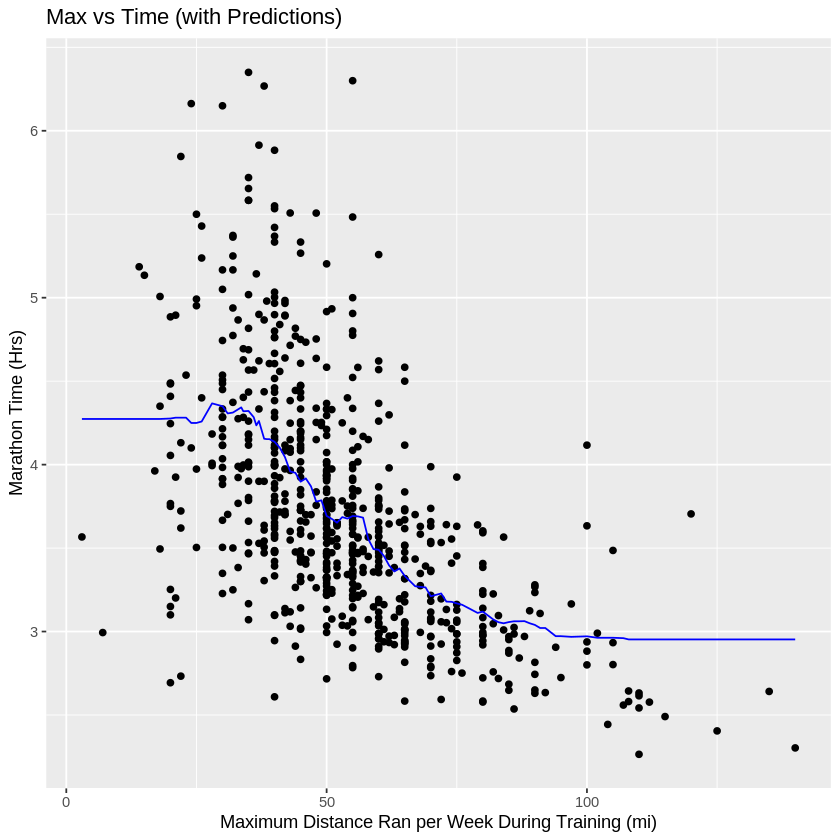

In [102]:
#Question 9.0
set.seed(2019) # DO NOT CHANGE

options(repr.plot.width = 7, repr.plot.height = 7)

marathon_preds <- marathon_best_fit %>%
  predict(marathon_training) %>%
  bind_cols(marathon_training)

marathon_plot <- ggplot(marathon_preds, aes(x = max, y = time_hrs)) +
  geom_point() +
  geom_line(aes(x = max, y = .pred), color = "blue") +
  labs(title = "Max vs Time (with Predictions)", x = "Maximum Distance Ran per Week During Training (mi)", y = "Marathon Time (Hrs)")

marathon_plot 

test_9.0()

In [103]:
#source('cleanup.R)